# Problem Set 3

### Problem 1: Ridge Regression and Co-linearity.

1\. Download and make sure you can run through and understand the Jupyter notebook on Ridge Regression and Colinearity we saw in class. <br>
2\. What is the test error of the “zero-variance” solution, namely, the all-zeros solution? 

Solution: Suppose the ground truth is that $y = \beta_0 + X\beta + e$ and the function we have selected is $h(x) = \beta_0+X\beta$. Since we have chosen the "zero-variance" solution which introduces a really large $\lambda$ as $\beta=\vec{0}$, the test error (using the squared error) could be calculated as follows:
$$
\begin{equation}
\begin{aligned}
Test\, error & = \sum_{i=0}^{n}{(h(x_i)-y_i)^2} \\
& = ||\beta_0 + X\vec{0} - \beta_0 - X\beta - e||_2^2 \\
& = ||X\beta+e||^2_2\\
\end{aligned}
\end{equation}
$$

3\. The least-squares solution does not seem to do too well, because it has so much variance. Still, it is unbiased. Show this empirically: generate many copies of the data, and for each one, obtain the least-squares solution. Average these, to show that while each run produces a beta hat that is very different, their average begins to look more and more like the true beta.

Solution: Notice that if we simply use copies of the data, for each time, the obtained least-squares solution will remain the same. So here, we are generating random data set with the same size.<br>
Suppose that the ground truth is $y = x\beta + e \,(\beta = 3)$ and $e_i \sim \mathcal N(0,1),\, i.i.d.,\, x_i \sim \mathcal N(0,1),\, i.i.d.$. <br>
Let's generate different sample sets with the sample size of 150 and estimate $\beta$ for each set.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
def estimateBeta(beta0 = -3, beta = 3, sample_num = 150):
    x = np.random.normal(0, 1, sample_num)
    e = np.random.normal(0, 1, sample_num)
    y = [beta0 + beta*x[i] + e[i] for i in range(sample_num)]
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    beta_hat = lr.coef_[0]
    beta0_hat = lr.intercept_
    return beta0_hat, beta_hat, x, y

In [3]:
n_experiment = 200
beta0 = -3
beta = 3
sample_num = 150
beta_list = [(estimateBeta(beta0, beta, sample_num)) for i in range(n_experiment)]

beta0_empirical = [item[0] for item in beta_list]
beta_empirical = [item[1] for item in beta_list]
x_total = [item[2] for item in beta_list]
y_total = [item[3] for item in beta_list]
beta_empirical_mean = [np.mean(beta_empirical[0: i+1]) for i in range(len(beta_empirical))]

In [4]:
import matplotlib.pyplot as plt
plt.scatter(range(1, n_experiment+1), beta0_empirical, marker = '.', label = r'Empirical $\beta_{0}$')
plt.plot(range(1, n_experiment+1), [beta0 for i in range(n_experiment)], label = r'Ground Truth', color='magenta')
plt.xlabel("Experiment")
plt.ylabel(r"$\beta_{0}$")
plt.legend()
plt.title(r"Empirical $\beta0$ for each experiment")
plt.show()

<Figure size 640x480 with 1 Axes>

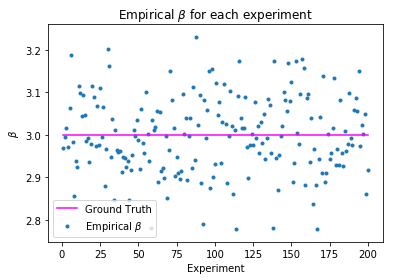

In [5]:
plt.scatter(range(1, n_experiment+1), beta_empirical, marker = '.', label = r'Empirical $\beta$')
plt.plot(range(1, n_experiment+1), [beta for i in range(n_experiment)], label = r'Ground Truth', color='magenta')
plt.xlabel("Experiment")
plt.ylabel(r"$\beta$")
plt.legend()
plt.title(r"Empirical $\beta$ for each experiment")
plt.show()

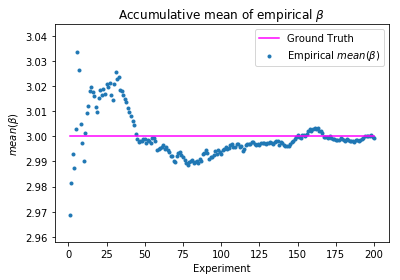

In [6]:
plt.scatter(range(1, n_experiment+1), beta_empirical_mean, marker = '.', label = r'Empirical $mean(\beta)$')
plt.plot(range(1, n_experiment+1), [beta for i in range(n_experiment)], label = r'Ground Truth', color='magenta')
plt.xlabel("Experiment")
plt.ylabel(r"$mean(\beta)$")
plt.legend()
plt.title(r"Accumulative mean of empirical $\beta$")
plt.show()

4\. Alternatively, if one had access to lots of data, instead of computing the least-square solution over smaller batches and then averaging these solutions as in the previous part of the problem, an approach is to run a single least-squares regression over all the data. Which approach do you think is better? Can you support your conclusion with experiments?

In [7]:
x_total = np.hstack(x_total)
y_total = np.hstack(y_total)
lr = LinearRegression()
lr.fit(x_total.reshape(-1, 1), y_total)
beta_hat_total = lr.coef_[0]
beta0_hat_total = lr.intercept_

In [8]:
print("Mean of \u03B2 estimated in small batches is {}".format(beta_empirical_mean[-1]))
print("Estimated \u03B2 for a single least-squares regression is {}".format(beta_hat_total))

Mean of β estimated in small batches is 2.9992868607582377
Estimated β for a single least-squares regression is 3.000278587115901


In [9]:
def batchSingle(beta0 = -3, beta = 3, sample_num = 150, n_experiment = 200):
    beta_list = [(estimateBeta(beta0, beta, sample_num)) for i in range(n_experiment)]
    beta0_empirical = [item[0] for item in beta_list]
    beta_empirical = [item[1] for item in beta_list]
    x_total = [item[2] for item in beta_list]
    y_total = [item[3] for item in beta_list]
    beta_empirical_mean = [np.mean(beta_empirical[0: i+1]) for i in range(len(beta_empirical))]
    x_total = np.hstack(x_total)
    y_total = np.hstack(y_total)
    lr = LinearRegression()
    lr.fit(x_total.reshape(-1, 1), y_total)
    beta_hat_total = lr.coef_[0]
    beta0_hat_total = lr.intercept_
    return beta_empirical_mean[-1], beta_hat_total

In [10]:
batches_single = [batchSingle(beta0, beta, sample_num, n_experiment) for i in range(200)]
beta_batches_mean = [item[0] for item in batches_single]
beta_single = [item[1] for item in batches_single]

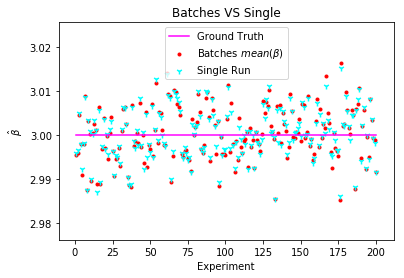

In [11]:
plt.scatter(range(1, len(beta_batches_mean)+1), beta_batches_mean, marker = '.', color = 'r',label = r'Batches $mean(\beta)$')
plt.plot(range(1,  len(beta_batches_mean)+1), [beta for i in range(200)], label = r'Ground Truth', color='magenta')
plt.scatter(range(1, len(beta_single)+1), beta_single, marker = '1', color = 'cyan', label = r'Single Run')
plt.xlabel("Experiment")
plt.ylabel(r"$\hat{\beta}$")
plt.legend()
plt.title(r"Batches VS Single")
plt.show()

In [12]:
sum_squared_error_batch = sum([(item -beta)**2 for item in beta_batches_mean])
sum_squared_error_single = sum((item - beta)**2 for item in beta_single)

In [13]:
print("SSE of batches is {}".format(sum_squared_error_batch))
print("SSE of single run is {}".format(sum_squared_error_single))

SSE of batches is 0.007127919200141299
SSE of single run is 0.00667553895191568


Our conclusion is that it's better to run many batches and calculate the mean.The explanation is as following:<br>
Suppose that $t$ is the number of experiments and $n$ is the number of samples in each experiment.
$$
\begin{equation}
\begin{aligned}
LSE & = \sum_{i=1}^n{(h(x_i)-y_i)^2} \\
& = \sum_{i=1}^n{(x_i\beta+\beta_0-x_i\beta_*-\beta_0^*-e_i)^2}\\
\frac{\partial{L}}{\partial{\beta}} & = \sum_{i=1}^n{2[x_i^2(\beta-\beta^*)+x_i(\beta_0-\beta_0^* -e_i)]} \\
\hat{\beta} & = \beta^* + \beta_0^* - \hat{\beta_0}+\frac{\sum_{i=1}^n{e_ix_i}}{\sum_{i=1}^n{x_i^2}} \\
Var(\hat{\beta}) & = \frac{\sigma^2}{\sum_{i=1}^n{x_i^2}} \\
& = \frac{\sigma_{e}^2}{n\sigma^2_{x_i}}
\end{aligned}
\end{equation}
$$

For the single run,$$Var(\hat{\beta})=\frac{1}{nt}.$$
For mean of small batches,
$$
\begin{equation}
\begin{aligned}
mean(\hat{\beta}) & = \sum_{j=1}^t{\hat{\beta_j}} \\
Var(\frac{1}{t}\sum_{j=1}^t{(\hat{\beta_j}}) & = \frac{1}{t^2}\sum_{j=1}^t{Var(\hat{\beta_j})} \\
& = \frac{1}{t^2}\frac{1}{n} \\
& = \frac{1}{nt^2} \\
&< Var(\hat{\beta_{single}})
\end{aligned}
\end{equation}
$$

### Problem 2: Starting in Kaggle.
On October 22nd, we are opening a Kaggle competition made for this class. In that one, you will be participating on your own. This is an intro to get us started, and also an excuse to work with regularization and regression which we have been discussing.
1. Let’s start with our first Kaggle submission in a playground regression competition. Make an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regressiontechniques/
2. Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advancedregression-techniques/regularized-linear-models. Then run a ridge regression using α = 0.1. Make a submission of this prediction, what is the RMSE you get? (Hint: remember to exponentiate np.expm1(ypred) your predictions).
3. Compare a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best score you can get from a single ridge regression model and from a single lasso model?
4. Plot the l0 norm (number of nonzeros) of the coefficients that lasso produces as you vary the strength of regularization parameter alpha.
5. Add the outputs of your models as features and train a ridge regression on all the features plus the model outputs (This is called Ensembling and Stacking). Be careful not to overfit. What score can you get? (We will be discussing ensembling more, later in the class, but you can start playing with it now).

6\. (Optional)
Install XGBoost (Gradient Boosting) and train a gradient boosting regression.
What score can you get just from a single XGB? (you will need to optimize over its parameters). We will discuss boosting and gradient boosting in more detail later. XGB is a great friend to all good Kagglers! <br>
7\. (Optional) Do your best to get the more accurate model. Try feature engineering and stacking
many models. You are allowed to use any public tool in python. No non-python tools allowed.<br>
8\. (Optional) Read the Kaggle forums, tutorials and Kernels in this competition. This is an
excellent way to learn. Include in your report if you find something in the forums you like, or
if you made your own post or code post, especially if other Kagglers liked or used it afterwards. <br>
9\. Be sure to read and learn the rules of Kaggle! No sharing of code or data outside the Kaggle
forums. Every student should have their own individual Kaggle account and teams can be
formed in the Kaggle submissions with your Lab partner. This is more important for live
competitions of course.<br>


#### 1. Kaggle Account: Matt Viteri - mxviteri

#### 2. Data Preprocessing and RMSE

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [15]:
train = pd.read_csv('./house-prices/train.csv')
test = pd.read_csv('./house-prices/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ceae240>,
      dtype=object)

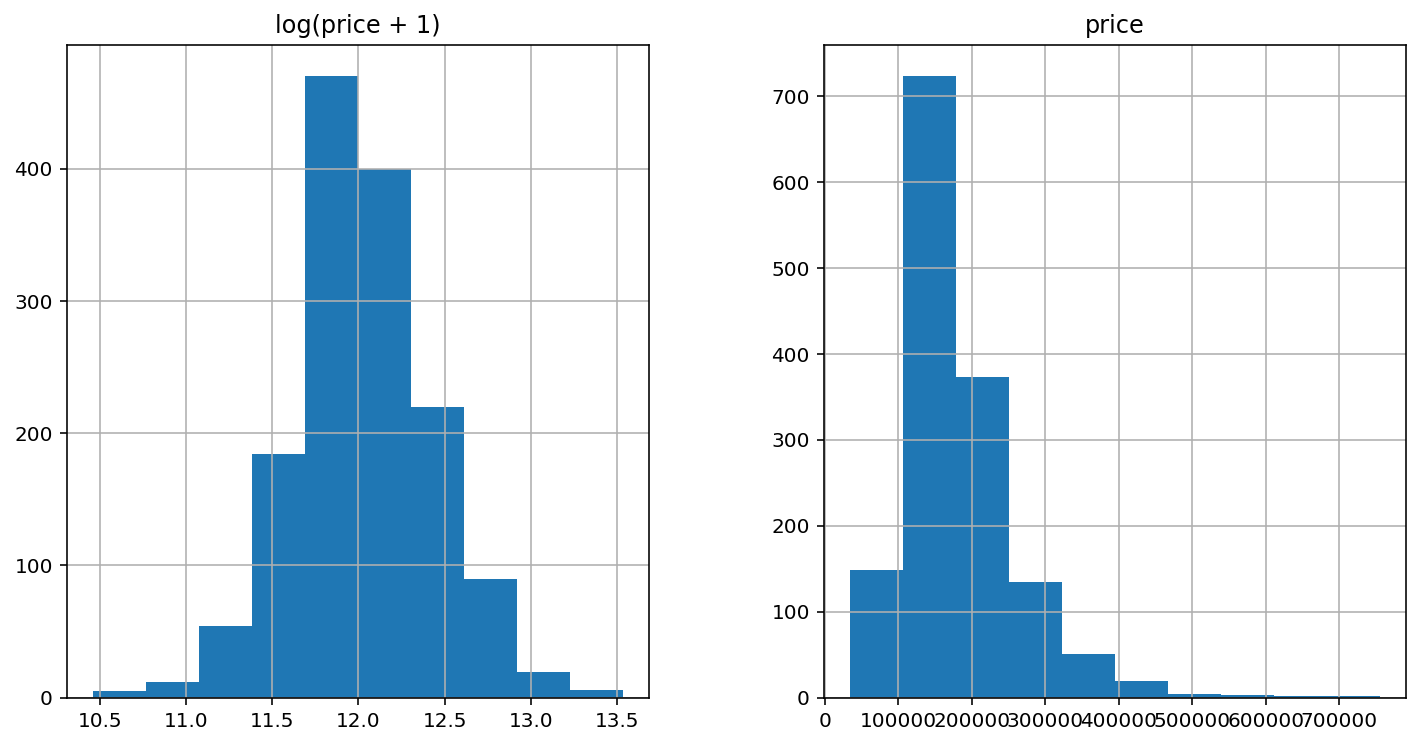

In [16]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [17]:
# log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log1p
  # This is added back by InteractiveShellApp.init_path()


#### --- End Preprocessing ---

In [46]:
display(X_train.head())
display(X_test.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,4.795791,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,0,0,0,1,0,0,0,0,1,0


12.24769911637256
[12.2418857]
[207291.41324549]


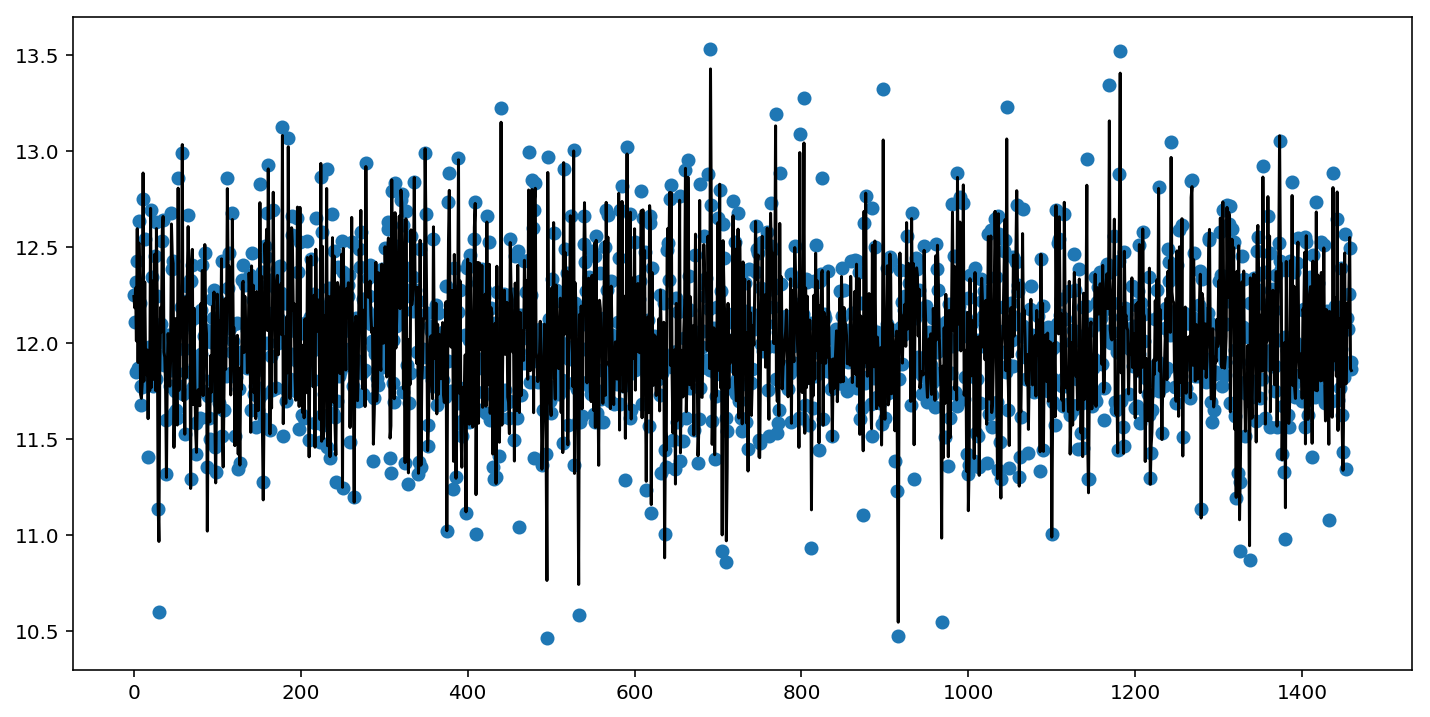

In [47]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y)

plt.scatter(X_train.index, y)
plt.plot(X_train.index, clf.predict(X_train), color='k')

# testing fit ON TRAINING DATA - first line
# price after get_dummies
print(y[0])
# feature prediction (should be close to above)
pred = clf.predict([X_train.iloc[0]])
print(pred)
# expm1 - original sale price - before get dummies
print(np.expm1(pred))

In [50]:
testids = test['Id']
ypred = clf.predict(X_test)
prices = np.expm1(ypred)

results_df = pd.DataFrame({ 'Id': testids, 'SalePrice': np.round(prices, 3) })
display(results_df.head())

results_df.to_csv('./house-prices/submission.csv', header=['Id', 'SalePrice'], index=False)

,Id,SalePrice
0,1461,121519.487
1,1462,159637.898
2,1463,187900.728
3,1464,200719.158
4,1465,199280.935


Received RMSE score of 0.13029 from Kaggle

#### 3. Compare Ridge and Lasso

In [71]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

min rmse: 0.12733734668670765


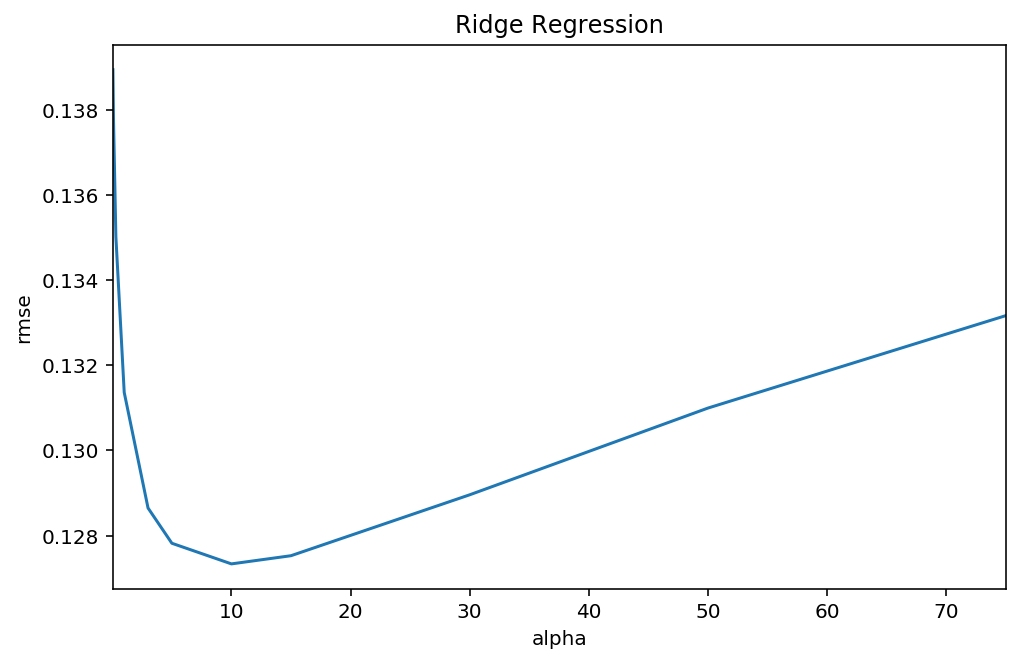

In [72]:
plt.figure(figsize=(8,5))
model_ridge = Ridge()

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")

print('min rmse: {}'.format(cv_ridge.min()))

min rmse: 0.18403762011012686


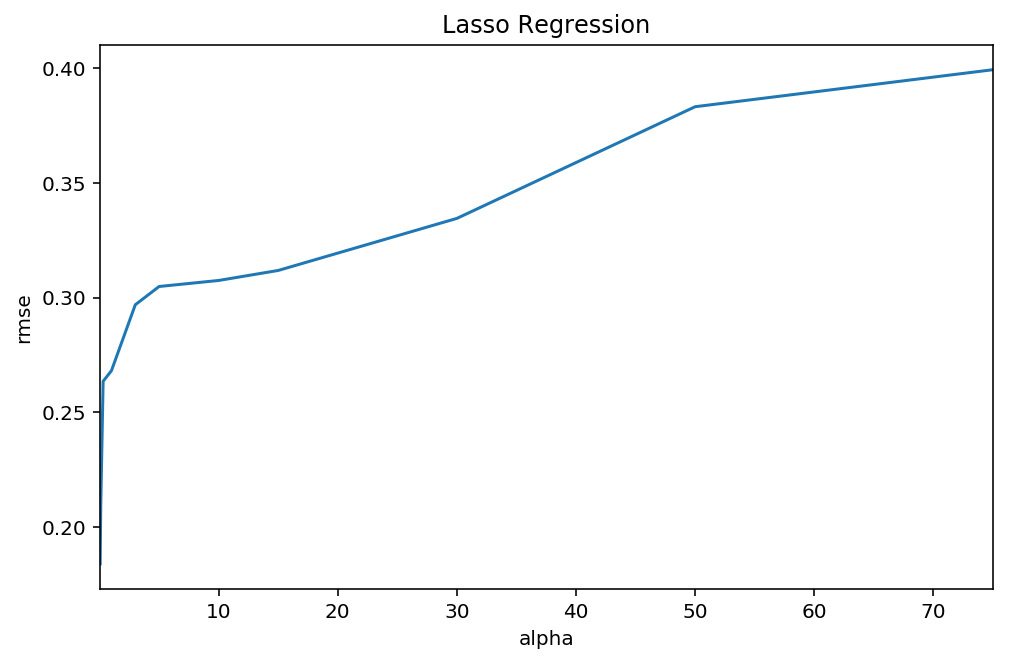

In [73]:
plt.figure(figsize=(8,5))

cv_lasso = [rmse_cv(Lasso(alpha=alpha)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("rmse")

print('min rmse: {}'.format(cv_lasso.min()))

In [78]:
print('Best scores (rounded):')
print('Ridge - {}'.format(round(cv_ridge.min(), 5)))
print('Lasso - {}'.format(round(cv_lasso.min(), 5)))

print('Currently, the Ridge model performs slightly better')

Best scores (rounded):
Ridge - 0.12734
Lasso - 0.18404
Currently, the Ridge model performs slightly better


#### 4. l0 norm - Lasso

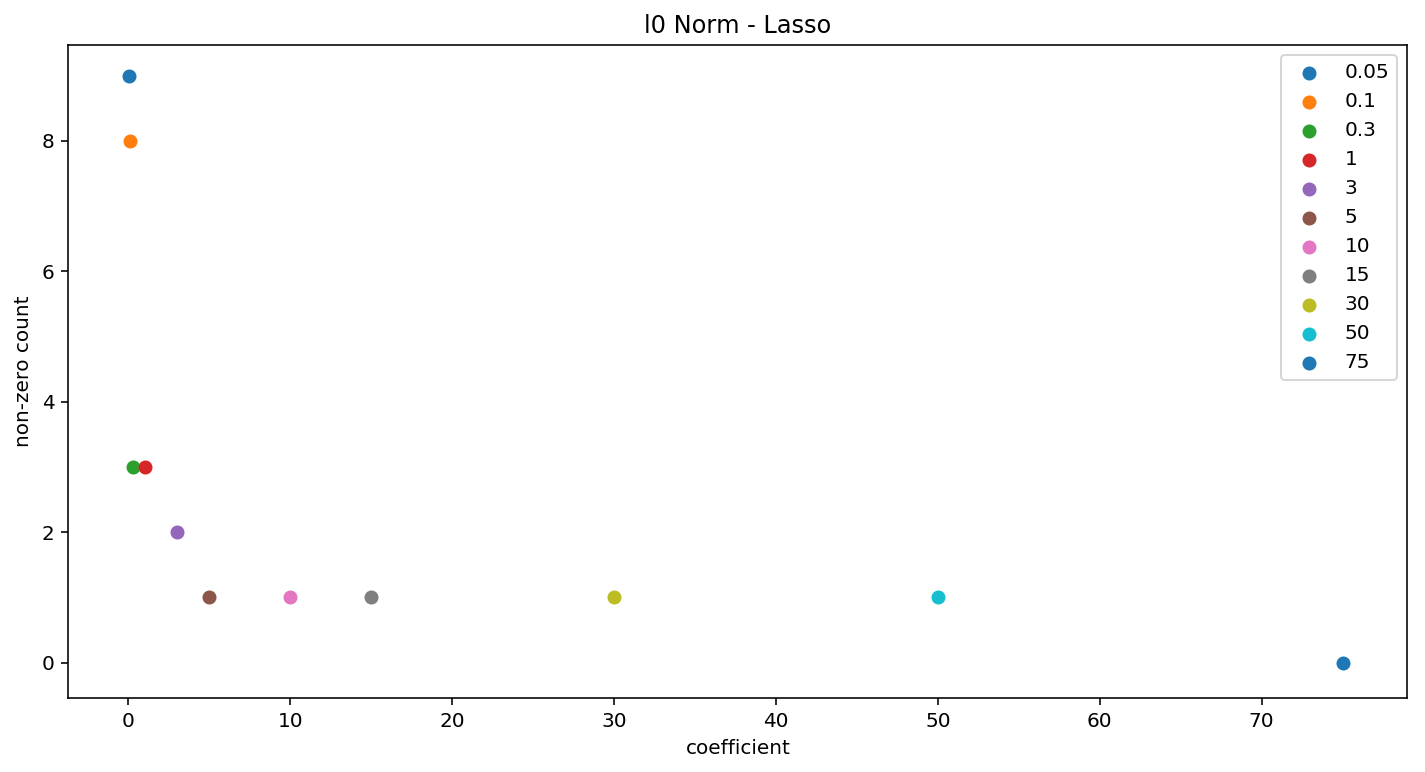

In [105]:
coefs = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

for c in coefs:
    l = Lasso(alpha=c)
    l.fit(X_train, y)
    nonzero = l.coef_ != 0
    count = list(nonzero).count(True)
    plt.scatter(c, count)

plt.title("l0 Norm - Lasso")
plt.xlabel("coefficient")
plt.ylabel("non-zero count")
plt.legend(coefs)
plt.show()